Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#@author FER
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);
    plt.show()

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost = 1.0
Težine = 2.1 -0.5000000000000002 -0.09999999999999981


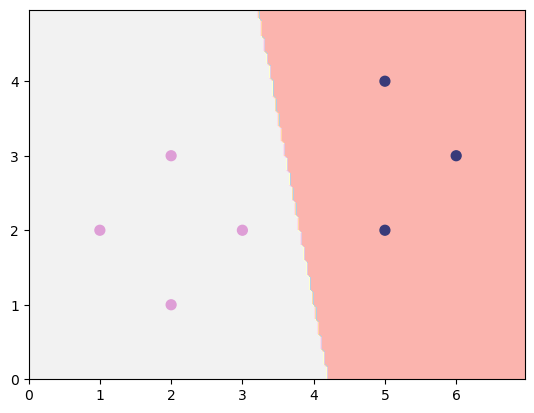

In [5]:
#@author Simun Sopar
clf = RidgeClassifier(alpha = 0.0).fit(seven_X, seven_y)
seven_y_pred = clf.predict(seven_X)

print('Točnost =', accuracy_score(seven_y, seven_y_pred))

#X_true = [list(seven_X[i]) for i in range(0, len(seven_y)) if seven_y[i] == 1]
#X_false = [list(seven_X[i]) for i in range(0, len(seven_y)) if seven_y[i] == 0]

w0 = clf.intercept_[0]
w1, w2 = clf.coef_[0]
print('Težine =', w0, w1, w2)

'''
plt.scatter(list(np.array(X_true)[:,0]), list(np.array(X_true)[:,1]), marker='o', label='y=1')
plt.scatter(list(np.array(X_false)[:,0]), list(np.array(X_false)[:,1]), marker='x', label='y=0')



x1_min = seven_X[:,0].min() - 1
x1_max = seven_X[:,0].max() + 1

w0 = clf.intercept_[0]
w1, w2 = clf.coef_[0]


x1_mesh = np.arange(x1_min, x1_max, 0.1)
x2_mesh = np.array([(-w0 - w1*x)/w2 for x in x1_mesh])
plt.plot(x1_mesh, x2_mesh, ls='--', c = 'black', label='Granica klasa')

plt.legend()
plt.plot()
'''

plot_2d_clf_problem(seven_X, seven_y, clf.predict)

print('')

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Težine = 1.5500000000000003 -0.25000000000000006 -0.050000000000000086
Točnost = 1.0


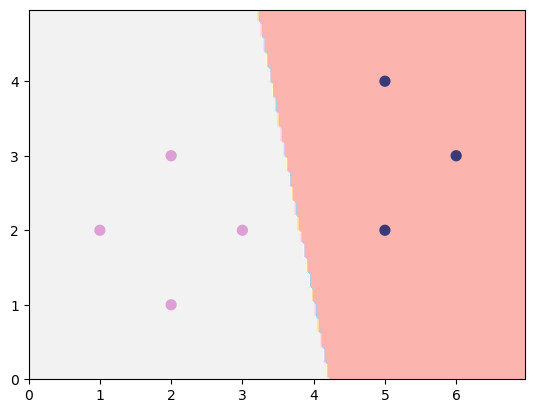

In [6]:
#@author Simun Sopar
reg = LinearRegression().fit(seven_X, seven_y)
print('Težine =', reg.intercept_, reg.coef_[0], reg.coef_[1])

seven_y_pred = [1 if reg.predict(seven_X)[i] >= 0.5 else 0 for i in range(0, len(seven_y))]
print('Točnost =', accuracy_score(seven_y, seven_y_pred))

plot_2d_clf_problem(seven_X, seven_y, lambda x: reg.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost = 0.875


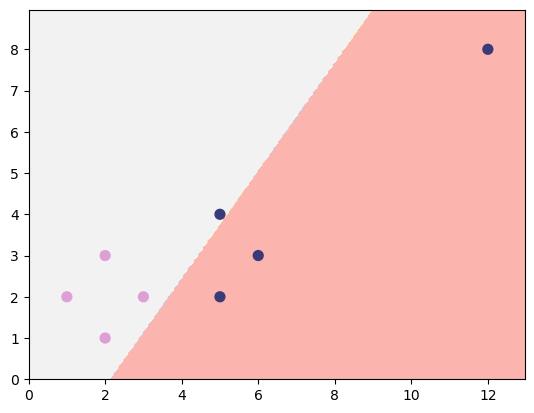

In [8]:
#@author Simun Sopar
clf = RidgeClassifier(alpha = 0.0).fit(outlier_X, outlier_y)

outlier_y_pred = clf.predict(outlier_X)
print('Točnost =', accuracy_score(outlier_y, outlier_y_pred))

plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

print('')

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost = 0.875


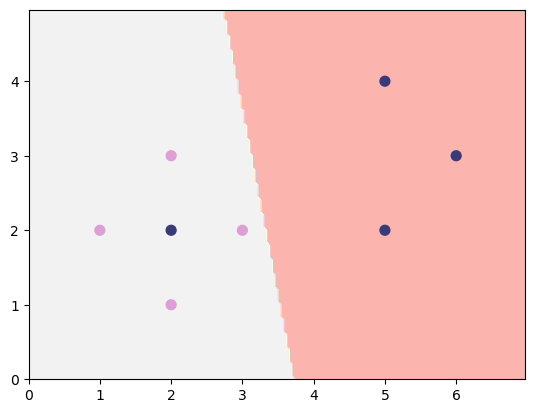

In [10]:
#@author Simun Sopar
clf = RidgeClassifier(alpha = 0.0).fit(unsep_X, unsep_y)

unsep_y_pred = clf.predict(unsep_X)
print('Točnost =', accuracy_score(unsep_y, unsep_y_pred))

plot_2d_clf_problem(unsep_X, unsep_y, clf.predict)

print('')

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

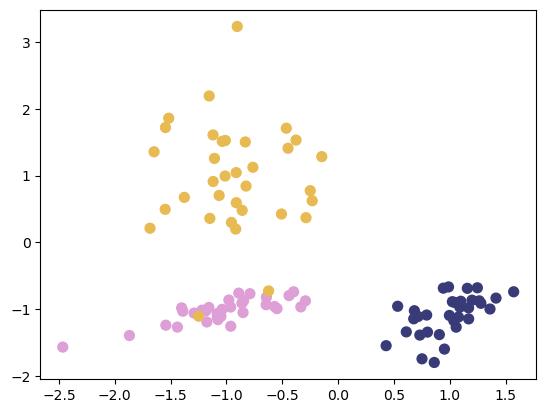

In [11]:
#@author Simun Sopar
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

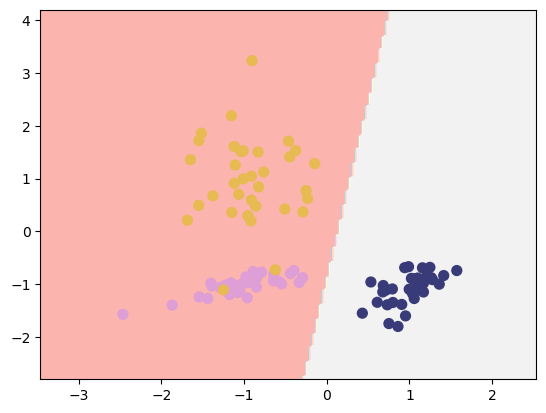

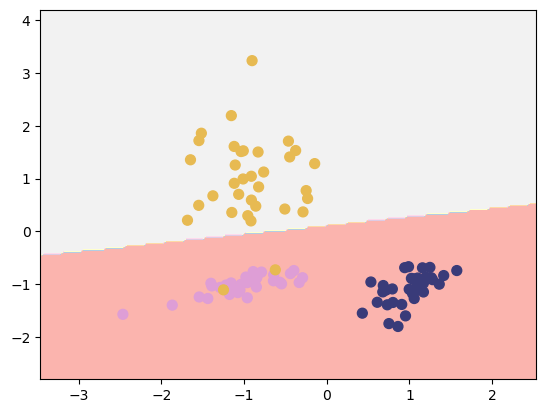

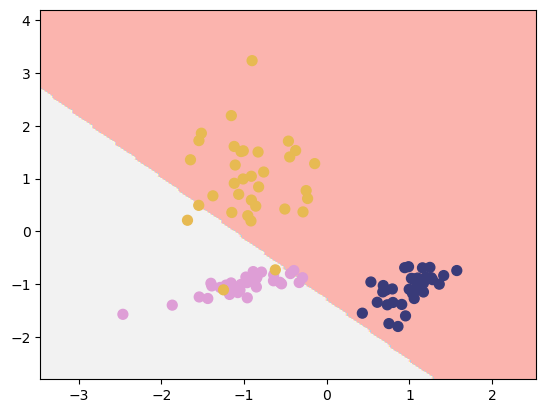

In [12]:
#@author Simun Sopar
y1 = [1 if y[i] == 0 else 0 for i in range(0, len(y))]  #definira vrijednosti klasa za svaki slučaj OVR-a
y2 = [1 if y[i] == 1 else 0 for i in range(0, len(y))]
y3 = [1 if y[i] == 2 else 0 for i in range(0, len(y))]


h1 = LinearRegression().fit(X, y1)
h2 = LinearRegression().fit(X, y2)
h3 = LinearRegression().fit(X, y3)

plot_2d_clf_problem(X, y, lambda x: h1.predict(x) >= 0.5)
plot_2d_clf_problem(X, y, lambda x: h2.predict(x) >= 0.5)
plot_2d_clf_problem(X, y, lambda x: h3.predict(x) >= 0.5)

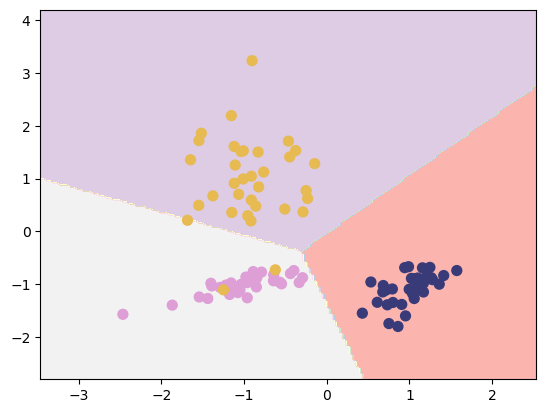

In [13]:
#@author Simun Sopar
def h_final(X):
    tmp1 = h1.predict(X)
    tmp2 = h2.predict(X)
    tmp3 = h3.predict(X)
    out = [np.argmax([tmp1[i], tmp2[i], tmp3[i]]) for i in range(0, len(tmp1))]
    return np.array(out)


plot_2d_clf_problem(X, y, h_final)

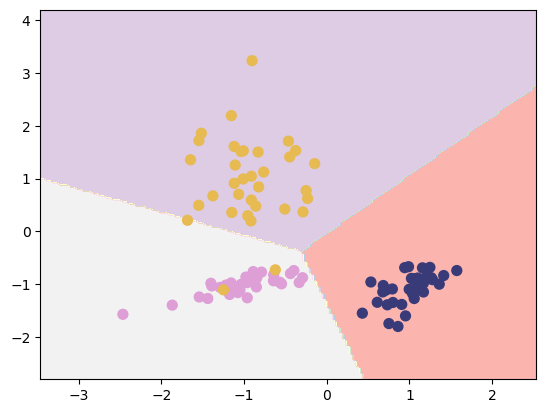

In [14]:
#@author Simun Sopar
clf = RidgeClassifier(alpha = 0.0).fit(X, y)

plot_2d_clf_problem(X, y, clf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

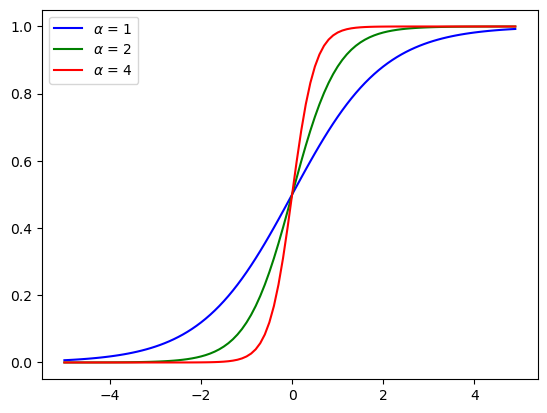

In [15]:
#@author Simun Sopar
def sigm(x, alpha = 1.0):
    return 1/(1 + np.exp(-alpha*x))

x_mesh = np.arange(-5, 5, 0.1)
plt.plot(x_mesh, sigm(x_mesh), c = 'blue', label=r'$\alpha$ = 1')
plt.plot(x_mesh, sigm(x_mesh, 2), c = 'green', label=r'$\alpha$ = 2')
plt.plot(x_mesh, sigm(x_mesh, 4), c = 'red', label=r'$\alpha$ = 4')
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [16]:
'''
from numpy import linalg
from scipy.optimize import line_search


#X mora imati prvi stupac pun jedinica!

def transform_y(y): #transformira y s {0,1} na {-1,1}
    if (test_y(y) == 1):
        return np.array([(yy + 1)/2 for yy in y])
    else:
        return y

    
def test_y(y):  #vraća 0 za y definiran na {0,1}, 1 za {-1, 1}
    for yy in y:
        if(yy == 0):
            return 0
        if(yy == -1):
            return 1  
    return 1





def lr_h(x, w): #model
    #problem: sigm vraća 0.0 za jako negativan argument
    #if(sigm(np.dot(x,w)) == 0.0):
    #    print(x, w)
    return sigm(np.dot(x, w))


#def grad_error(X, y, w):
#    N = len(y)
#    suma = np.zeros(len(w))
#    for i in range(0, len(y)):
#        suma += (lr_h(X[i], w) - y[i])*X[i]
#    return suma/N

def cross_entropy_error(X, y, w): #unakrsna entropija
    N = len(y)
    suma = 0
    for i in range(0, len(y)):
        #problem: ako lr_h vrati 0, onda log(0) = -inf - greške u algoritmu
        suma += -y[i]*np.log(lr_h(X[i], w)) - (1-y[i])*np.log(1 - lr_h(X[i], w))
    return 1/N*suma





def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False): #algoritam treniranja
    y = transform_y(y)
    w = [0 for i_tmp in range(0, len(X[0]))]
    for i in range(0, max_iter): #petlja koja se ponavlja max_iter puta ili dok ne dođemo do minimuma
        dw = [0 for i_tmp in range(0, len(X[0]))]
        for j in range(0, len(y)): #petlja po primjerima
            dw = dw - ((lr_h(X[j], w) - y[j]) * X[j])
        err1 = cross_entropy_error(X,y,w)
        w += eta*dw
        err2 = cross_entropy_error(X,y,w)
        if(np.abs(err2 - err1) <= epsilon):
            break
    return w

from sklearn.preprocessing import PolynomialFeatures
seven_fi = PolynomialFeatures(1).fit_transform(seven_X)

w = lr_train(seven_fi, seven_y, eta = 0.01)
print(lr_h([1,6,3], w))
w


def lr_predict(X, w): #X je zapravo fi, prvi stupac su jedinice
    y = []
    for i in range(0, len(X)):
        if(lr_h(X[i], w) >= 0.5):
            y.append(1)
        else:
            y.append(0)
    return np.array(y)


plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_predict(PolynomialFeatures(1).fit_transform(x), w))


'''
print('')

In [17]:
#@author Simun Sopar
from numpy import linalg



def transform_y(y):   #transformira y s {-1, 1} na {0, 1}
    if (test_y(y) == 1):
        return np.array([(yy + 1)/2 for yy in y])
    else:
        return y

    
def test_y(y):    #vraća 0 za y definiran na {0, 1}, 1 za {-1, 1}
    for yy in y:
        if(yy == 0):
            return 0
        if(yy == -1):
            return 1  
    return 0





def lr_h(x, w0, w_vec): #model
    return sigm(np.dot(x, w_vec) + w0)



def cross_entropy_error(X, y, w0, w_vec): #unakrsna entropija
    N = len(y)
    suma = 0
    for i in range(0, N):
        suma += -y[i]*np.log(lr_h(X[i], w0, w_vec)) - (1-y[i])*np.log(1 - lr_h(X[i], w0, w_vec))
    return 1/N*suma





def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False): #algoritam treniranja
    y = transform_y(y)
    w_matrix = []
    w0 = 0
    w_vec = np.array( [0 for i_tmp in range(0, len(X[0]))] )
    w_matrix.append(list(np.r_[w0, w_vec]))
    for i in range(0, max_iter): #petlja koja se ponavlja max_iter puta ili dok ne dođemo do minimuma
        dw_vec = np.array( [0 for i_tmp in range(0, len(X[0]))] )
        dw0 = 0
        for j in range(0, len(y)): #petlja po primjerima
            dw0 = dw0 - (lr_h(X[j], w0, w_vec) - y[j]) * 1
            dw_vec = dw_vec - (lr_h(X[j], w0, w_vec) - y[j]) * X[j]
        err1 = cross_entropy_error(X, y, w0, w_vec)
        w0 += eta*dw0
        w_vec = (1 - eta*alpha)*w_vec + eta*dw_vec
        w_matrix.append(list(np.r_[w0, w_vec]))
        err2 = cross_entropy_error(X, y, w0, w_vec)
        if(np.abs(err2 - err1) <= epsilon):
            break
    if (trace == True):
        return np.r_[w0, w_vec], np.array(w_matrix)
    else:
        return np.r_[w0, w_vec]

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [18]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [19]:
#@author Simun Sopar

w = lr_train(seven_X, seven_y, eta = 0.01)
w

array([ 4.45449454, -1.71089242,  0.68413507])

In [20]:
#@author Simun Sopar
w, w_matrix = lr_train(seven_X, seven_y, trace = True)

In [21]:
#@author Simun Sopar
def lr_predict(X, w): 
    y = []
    w0 = w[0]
    w_vec = w[1:len(w)]
    for i in range(0, len(X)):
        if(lr_h(X[i], w0, w_vec) >= 0.5):
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

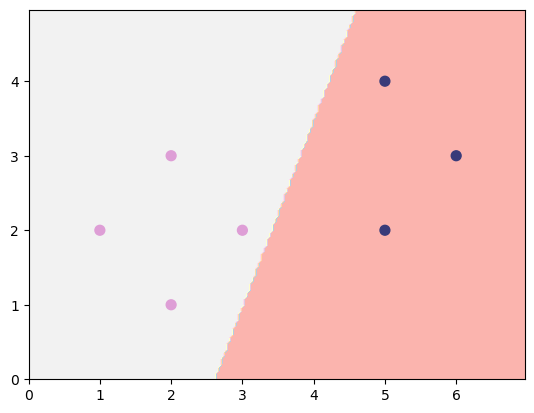

In [22]:
#@author Simun Sopar
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_predict(x, w))

In [23]:
#@author Simun Sopar
w_vec = [w[i] for i in range(1, len(w))]
cross_entropy_error(seven_X, seven_y, w[0], w_vec)

0.13521872720206748

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [24]:
from sklearn.metrics import zero_one_loss

Text(0, 0.5, 'Greška unakrsne entropije')

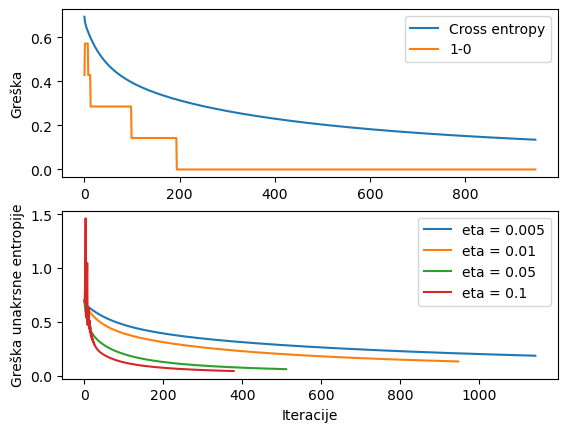

In [25]:
#@author Simun Sopar
eta_mesh = [0.005, 0.01, 0.05, 0.1]
iter_mesh = []
cross_err_mesh = []
zero_one_err_mesh = []

N = len(seven_y)

for i in range(0, len(w_matrix)):
    ww = w_matrix[i]
    iter_mesh.append(i)
    cross_err_mesh.append(cross_entropy_error(seven_X, seven_y, ww[0], ww[1:len(ww)]))
    
    y_pred = lr_predict(seven_X, ww)
    zero_one_err_mesh.append(zero_one_loss(seven_y, y_pred))
    
plt.subplot(2,1,1)
plt.plot(iter_mesh, cross_err_mesh, label='Cross entropy')
plt.plot(iter_mesh, zero_one_err_mesh, label='1-0')
#plt.xlabel('Iteracije')
plt.ylabel('Greška')
plt.legend()


plt.subplot(2,1,2)
for etaa in eta_mesh:
    w2, w2_matrix = lr_train(seven_X, seven_y, eta = etaa, trace = True)
    cross_err_mesh = []
    iter_mesh = []
    for i in range(0, len(w2_matrix)):
        ww = w2_matrix[i]
        iter_mesh.append(i)
        cross_err_mesh.append(cross_entropy_error(seven_X, seven_y, ww[0], ww[1:len(ww)]))
    plt.plot(iter_mesh, cross_err_mesh, label= 'eta = ' + str(etaa))
    
plt.legend()
plt.xlabel('Iteracije')
plt.ylabel('Greška unakrsne entropije')
#plt.xlim(0, 100)





**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[46.26968486] [[-14.80304235   4.33454163]]


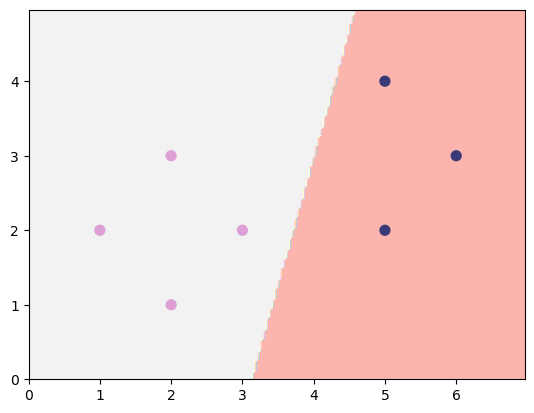

In [26]:
#@author Simun Sopar
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'none').fit(seven_X, seven_y)
print(clf.intercept_, clf.coef_)
plot_2d_clf_problem(seven_X, seven_y, lambda x: clf.predict(x) >= 0.5)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [27]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

[42.32235916] [[-12.87743574   3.00708643]]


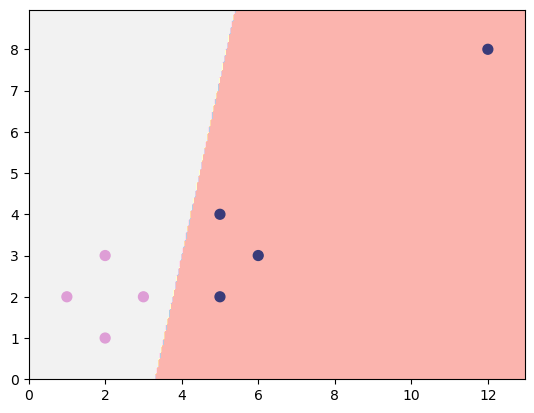

In [28]:
#@author Simun Sopar
clf = LogisticRegression(penalty = 'none').fit(outlier_X, outlier_y)
print(clf.intercept_, clf.coef_)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: clf.predict(x) >= 0.5)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

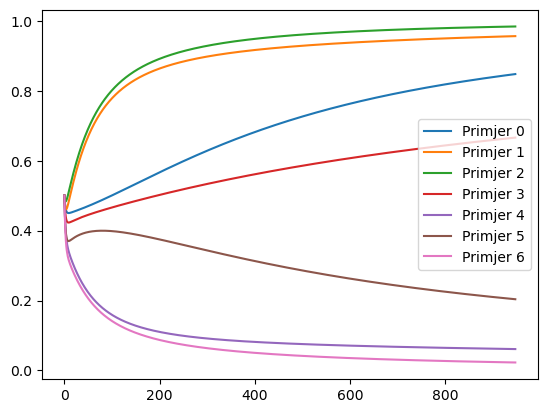

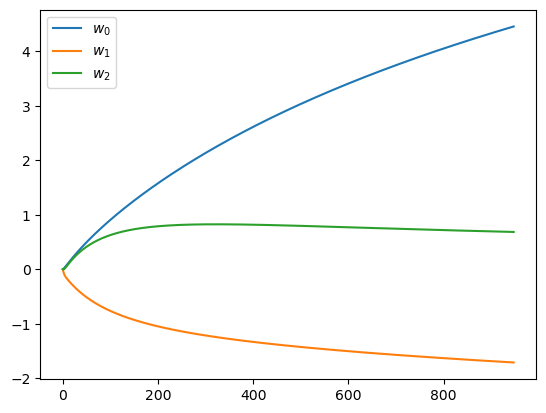

In [30]:
#@author Simun Sopar
iter_mesh = []
h_mesh = []

for i in range(0, len(w_matrix)):
    ww = w_matrix[i]
    h_row = []
    iter_mesh.append(i)
    for xx in seven_X:
        h_row.append(lr_h(xx, ww[0], ww[1:len(ww)]))
    h_mesh.append(h_row)
    

h_mesh = np.array(h_mesh)
#np.array(h_mesh)[:,7]

plt.plot(iter_mesh, h_mesh[:,0], label='Primjer 0')
plt.plot(iter_mesh, h_mesh[:,1], label='Primjer 1')
plt.plot(iter_mesh, h_mesh[:,2], label='Primjer 2')
plt.plot(iter_mesh, h_mesh[:,3], label='Primjer 3')
plt.plot(iter_mesh, h_mesh[:,4], label='Primjer 4')
plt.plot(iter_mesh, h_mesh[:,5], label='Primjer 5')
plt.plot(iter_mesh, h_mesh[:,6], label='Primjer 6')
plt.legend()
plt.show()



plt.plot(iter_mesh, w_matrix[:,0], label=r'$w_0$')
plt.plot(iter_mesh, w_matrix[:,1], label=r'$w_1$')
plt.plot(iter_mesh, w_matrix[:,2], label=r'$w_2$')
plt.legend()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [31]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

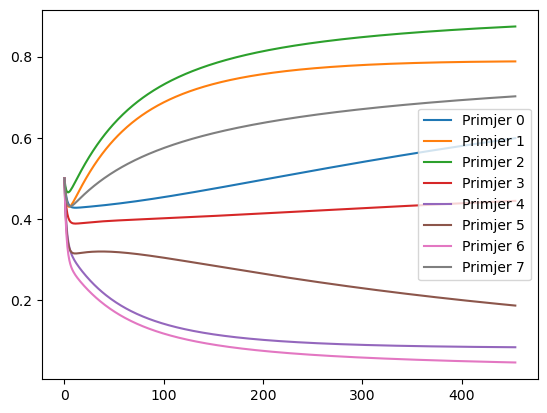

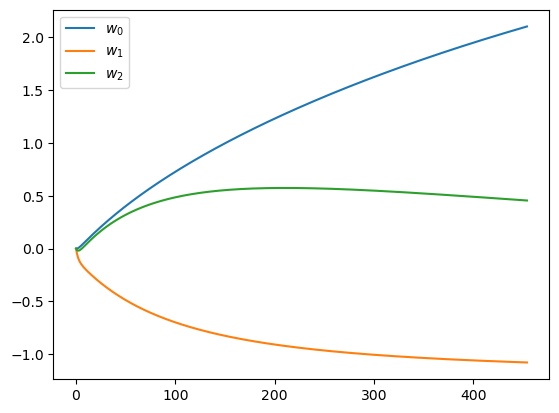

In [32]:
#@author Simun Sopar
w, w_matrix = lr_train(unsep_X, unsep_y, trace = True)

iter_mesh = []
h_mesh = []

for i in range(0, len(w_matrix)):
    ww = w_matrix[i]
    h_row = []
    iter_mesh.append(i)
    for xx in unsep_X:
        h_row.append(lr_h(xx, ww[0], ww[1:len(ww)]))
    h_mesh.append(h_row)
    

h_mesh = np.array(h_mesh)
#np.array(h_mesh)[:,7]

plt.plot(iter_mesh, h_mesh[:,0], label='Primjer 0')
plt.plot(iter_mesh, h_mesh[:,1], label='Primjer 1')
plt.plot(iter_mesh, h_mesh[:,2], label='Primjer 2')
plt.plot(iter_mesh, h_mesh[:,3], label='Primjer 3')
plt.plot(iter_mesh, h_mesh[:,4], label='Primjer 4')
plt.plot(iter_mesh, h_mesh[:,5], label='Primjer 5')
plt.plot(iter_mesh, h_mesh[:,6], label='Primjer 6')
plt.plot(iter_mesh, h_mesh[:,7], label='Primjer 7')
plt.legend()
plt.show()



plt.plot(iter_mesh, w_matrix[:,0], label=r'$w_0$')
plt.plot(iter_mesh, w_matrix[:,1], label=r'$w_1$')
plt.plot(iter_mesh, w_matrix[:,2], label=r'$w_2$')
plt.legend()
plt.show()

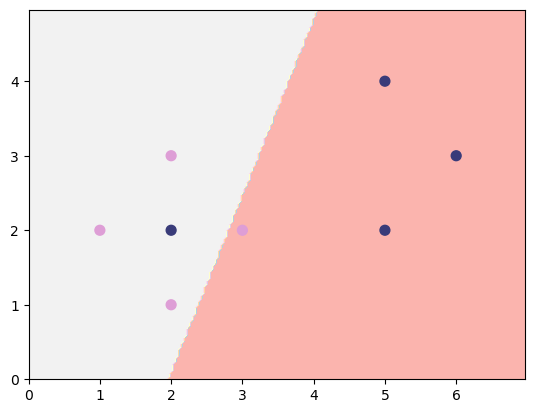

In [33]:
#@author Simun Sopar
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: lr_predict(x, w))

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [34]:
from numpy.linalg import norm

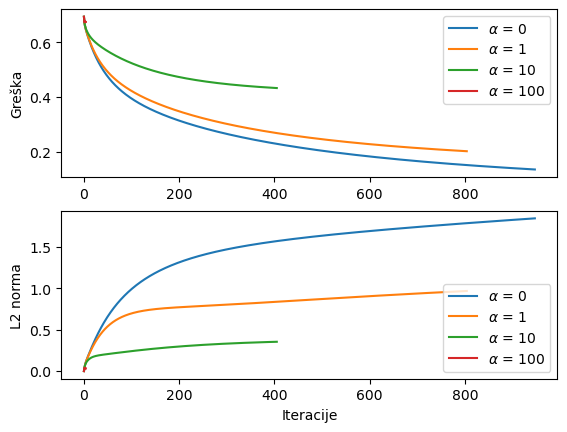

In [38]:
#@author Simun Sopar
alpha_mesh = [0,1,10,100]

for a in alpha_mesh:
    w, w_matrix = lr_train(seven_X, seven_y, alpha = a, trace = True)
    iter_mesh = []
    err_mesh = []
    l2_mesh = []
    
    for i in range(0, len(w_matrix)):
        ww = w_matrix[i]
        iter_mesh.append(i)
        err_mesh.append(cross_entropy_error(seven_X, seven_y, ww[0], ww[1:len(ww)]))
        l2_mesh.append(norm(ww[1:len(ww)]))
        
    plt.subplot(2,1,1)
    plt.plot(iter_mesh, err_mesh, label=r'$\alpha$ = ' + str(a))
    plt.ylabel('Greška')
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(iter_mesh, l2_mesh, label=r'$\alpha$ = ' + str(a))
    plt.ylabel('L2 norma')
    plt.xlabel('Iteracije')
    
    plt.legend()
    


In [187]:
'''alpha = [0,1,10,100]
l2 = []
error = []

clf = LogisticRegression(penalty = 'none').fit(seven_X, seven_y)
l2.append(norm(clf.coef_))
error.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, np.r_[clf.intercept_, clf.coef_[0]]))
clf = LogisticRegression(C = 1.0).fit(seven_X, seven_y)
l2.append(norm(clf.coef_))
error.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, np.r_[clf.intercept_, clf.coef_[0]]))
clf = LogisticRegression(C = 1/10.0).fit(seven_X, seven_y)
l2.append(norm(clf.coef_))
error.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, np.r_[clf.intercept_, clf.coef_[0]]))
clf = LogisticRegression(C = 1/100.0).fit(seven_X, seven_y)
l2.append(norm(clf.coef_))
error.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, np.r_[clf.intercept_, clf.coef_[0]]))

plt.plot(alpha, l2)
plt.show()
plt.plot(alpha, error)'''
print('')

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

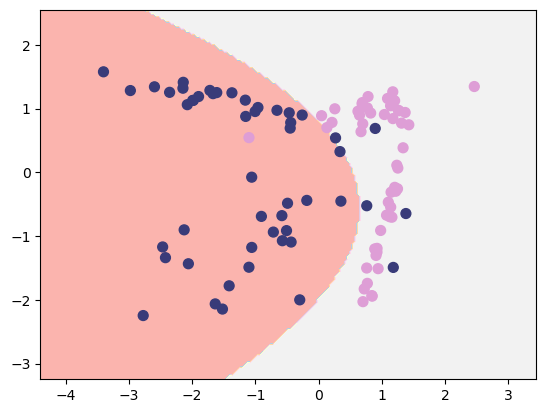

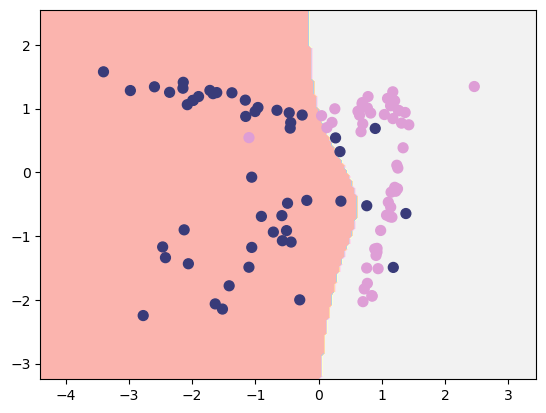

In [75]:
#@author Simun Sopar
from sklearn.preprocessing import PolynomialFeatures

X6, y6 = make_classification(n_samples = 100, n_features = 2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2)

fi2 = PolynomialFeatures(2).fit_transform(X6)
fi3 = PolynomialFeatures(3).fit_transform(X6)

clf2 = LogisticRegression(penalty = 'none').fit(fi2, y6)
clf3 = LogisticRegression(penalty = 'none').fit(fi3, y6)
#plot_2d_clf_problem(X6, y6)

plot_2d_clf_problem(X6, y6, lambda x : clf2.predict(PolynomialFeatures(2).fit_transform( np.array([x]) ) ) )


plot_2d_clf_problem(X6, y6, lambda x : clf3.predict(PolynomialFeatures(3).fit_transform( np.array([x]) ) ) )

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?